# Estimating Transmissivity Using Specific Capacity Data

This notebook have the objective to estimate transmissivity from the Caçapava - SP well data. This will achieved by relating the available Specific Capacity data to transmissivity. After that the results of transmissivity estimates will be compared with the results from Iritani, 1999.

---

According to Mace [2001] three approach can be used to estimate transmissivity from specific capacity data:
* Analytical techniques
* Empirical techniques
* Geostatistical techniques

Analytical approach is not possible to use due the lack of storativity estimates/values. The estimates from Iritani Thesis is not feasible (Iritani, 1999). According to Mace [2001] the use of empirical techniques are more appropiated in carbonate aquifers and for clastic aquifers the analytical approach is a better choice.

If are available transmissivity and specific capacity pairs the best approach is use empirical method, i. e., our case.

## Specific Capacity

Specific capacity is defined as well production per unit decline in head:

$S_c = \frac{Q}{s_w}$

where $Q$ is the pumping rate [$L^3$ e $t^-1$] and $S_w$ is the
measured drawdown (change in hydraulic head) in the well [$L$]. Note that the specific capacity has the same units as transmissivity.

Specific capacity is a function of:
* aquifer setting
  - transmissivity 
  - storativity
  - aquifer type
* well setting
  - well radius
  - degree of penetration
  - well losses due to well construction 
* pumping duration

## Empirical Method
PASTE Razack and Huntley (1991) found that the analytical
relationships (Thomasson and others, 1960; Theis and
others, 1963) uncorrected for well loss did not always
agree with measured values of transmissivity and that
empirical relationships produced less error than did
analytical solutions. The relationship is generally defined
between log-transformed values of transmissivity and
log-transformed values of specific capacity because
transmissivity and specific capacity are generally
lognormally distributed and, in this case, using log-log
relationships results in correlation coefficients that are better than those resulting from using untransformed
values (see, for example, Razack and Huntley, 1991;
EI-Naqa, 1994).

PASTE
The empirical approach involves 
* (1) compiling
all available aquifer-test information for an aquifer,
* (2) determining the transmissivity and specific capacity
for each of the tests, 
* (3) using regression to fit a line to
the plotted pairs of log transmissivity and log specific
capacity, and 
* (4) calculating the uncertainty in the linear
relationship.


### Step 1 and 2
As the available well data for the region of Caçapava do not have the information of drawdown x time, these first steps are get from the Iritani, 1999. Below are the few data results (adapted) obtained:

In [1]:
import pandas as pd
df = pd.read_csv('../data/IRITANI-data.csv')
df.head()

,poco,utm_e,utm_n,prof,ne,nd,dd,vazao,qs,rate_wtp,CJ_T,Theis_T,Neu_T
0,PA1,429350,7445220,165.0,14.7,36.7,22.0,144.0,6.55,0.040000,0.00300,0.00290,0.00120
1,PA10,426780,7443360,100.0,53.5,60.4,6.9,13.0,1.88,0.003611,0.00130,0.00059,0.00017
2,PA11,422710,7441630,167.0,43.3,62.1,18.8,82.2,4.37,0.022833,0.00120,0.00120,0.00056
3,PA12,423050,7441730,166.0,44.4,55.0,10.6,86.5,8.16,0.024028,0.00270,0.00270,NaN
4,PA13,424880,7444950,60.0,3.7,9.4,5.7,9.9,1.72,0.002750,0.00084,0.00057,0.00020


Where
- ```poco``` - well ID
- ```utm_e``` and ```utm_n``` - coordinates in meters
- ```prof``` - depth of the well in meters
- ```ne``` and ```nd``` - static water level and dynamic level in meters
- ```dd``` - drawdown in meters
- ```vazao``` - discharge in the aquifer test in cubic meters per hour
- ```qs``` - specific capacity in cubic meters per hour per meters
- ```rate_wtp``` - discharge rate in cubic meters per second to use in the welltestpy
- ```CJ_T``` - transmissivity estimate using Cooper-Jacob method in square meters per second
- ```Theis_T``` - transmissivity estimate using Theis method in square meters per second
- ```Neu_T``` - transmissivity estimate using Neuman method in square meters per second

## Step 3
Using regression to fit a line to the plotted pairs of log transmissivity and log specific capacity. The transmissivity data used is the obtained through Theis method because according to Iritani [1999] is the best estimates. First step is to do the log transformation:

In [2]:
import numpy as np
df['log_T'] = np.log(df['Theis_T'])
df['qs'] = df['qs']/(60*60)
df['log_Sc'] = np.log(df['qs'])
df.head()

,poco,utm_e,utm_n,prof,ne,nd,dd,vazao,qs,rate_wtp,CJ_T,Theis_T,Neu_T,log_T,log_Sc
0,PA1,429350,7445220,165.0,14.7,36.7,22.0,144.0,0.001819,0.040000,0.00300,0.00290,0.00120,-5.843045,-6.309224
1,PA10,426780,7443360,100.0,53.5,60.4,6.9,13.0,0.000522,0.003611,0.00130,0.00059,0.00017,-7.435388,-7.557417
2,PA11,422710,7441630,167.0,43.3,62.1,18.8,82.2,0.001214,0.022833,0.00120,0.00120,0.00056,-6.725434,-6.713926
3,PA12,423050,7441730,166.0,44.4,55.0,10.6,86.5,0.002267,0.024028,0.00270,0.00270,NaN,-5.914504,-6.089445
4,PA13,424880,7444950,60.0,3.7,9.4,5.7,9.9,0.000478,0.002750,0.00084,0.00057,0.00020,-7.469874,-7.646365


Least-squares regression can be used to fir a line to the log-transformed values by defining: 
$ \hat{Y_i} = b_0 + b_1 X_i $

where:

$ \hat{Y_i} = \log{T_i} $, and 

$ X_i = \log{(S_c)_i} $,

---

$ b_1 = \frac{SS_{xy}}{SS_x} $ 

$ SS_{xy} = \sum_{i=1}^{n} X_i Y_i - \frac{1}{n} (\sum_{i=1}^{n} X_i \sum_{i=1}^{n} Y_i) $,

$ SS_x = \sum_{i=1}^{n} X_i^2 - \frac{1}{n}(\sum_{i=1}^{n}X_i)^2 $, 

---

$ b_0 = \overline{Y} - b_1 \overline{X} $, 

$ \overline{Y} = \frac{1}{n} \sum_{i=1}^{n}Y_i $, 

$ \overline{X} = \frac{1}{n} \sum_{i=1}^{n}X_i $

By solving for $ b_0 $ and $ b_1 $ and rearranging the first equation is possible to estimate the transmissivity by:

$ T = (10^{b_0})S_c^{b_1} $

where $T$ is transmissivity and $S_c$ is specific capacity

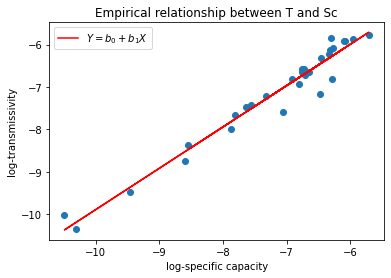

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df['log_Sc'].values.reshape(-1, 1)
Y = df['log_T'].values.reshape(-1, 1)
lr.fit(X, Y)
x = X
b0 = lr.intercept_[0]
b1 = lr.coef_[0]
y = b0 + b1*x
plt.scatter(df['log_Sc'], df['log_T'])
plt.plot(x, y, '-r', label='$ Y = b_0 + b_1 X $')
plt.title('Empirical relationship between T and Sc')
plt.xlabel('log-specific capacity')
plt.ylabel('log-transmissivity')
plt.legend(loc='upper left')

In [12]:
print('Where b0 = ', b0, 'and b1 = ', b1[0])

Where b0 =  -0.1357692150251184 and b1 =  0.9758561840467008


The coefficient of determination ($ R^2 $) can be calculated by:

$ R^2 = 1 - \frac{SS_\epsilon}{SS_\gamma} $

where,

$ SS_\gamma = \sum_{i=1}^{n} (Y_i - \overline{Y})^2 $, and

$ SS_\epsilon = \sum_{i=1}^{n} (\hat{Y_i} - Y_i)^2 $

In [13]:
from sklearn.metrics import r2_score
R2 = r2_score(X, Y)
print('R2 score for the model is: ', R2)

R2 score for the model is:  0.9562133735579241


The uncertainty of the regression can be quantified by using prediction intervals that define an envelope around the line that in turn defines how certain an estimate of transmissivity is for a given specific-capacity
value. The $ 100(1-a) $-percent prediction interval for $ \hat{Y_i} $ when $ X_i $ = $ X_p $ is:

$ \hat{Y_i} \pm t_\frac{\alpha}{2} \sqrt{1 + \frac{1}{n} + \frac{(X_p - \overline{X})^2}{SS_x}} $, 

whre $ \alpha $ is the level of significance and $ t_\frac{\alpha}{2} $ is based $ (n-1) $ degrees of freedom in which $ t_\frac{\alpha}{2} $ is defined from a statistical table of critical value of $ t $ for the $t$-distribution [Mace, 2001].

In [19]:
print('degrees of freedom =', len(df['log_Sc']) - 1, 'and alpha = 0.05')

degrees of freedom = 28 and alpha = 0.05


With that parameters and using the $t$ distribution table we have:
$ t_\frac{\alpha}{2} = 2.048 $

In [20]:
n = len(df['log_Sc'])
uncert = np.sqrt(1 + (1/n) + (((X - np.mean(X))**2)/(np.sum(np.power(X, 2))-((np.sum(X)**2)/n))))
print(uncert)

[[1.02576862]
 [1.01867491]
 [1.01960994]
 [1.03063877]
 [1.01951738]
 [1.02640243]
 [1.03418573]
 [1.01868936]
 [1.02625134]
 [1.01794835]
 [1.02567826]
 [1.02516732]
 [1.02271777]
 [1.01915777]
 [1.01728872]
 [1.01732215]
 [1.03036758]
 [1.01951274]
 [1.02031634]
 [1.02289123]
 [1.0190887 ]
 [1.03793599]
 [1.04145034]
 [1.02259853]
 [1.13462127]
 [1.12260779]
 [1.07443148]
 [1.0397571 ]
 [1.02153699]]


In [ ]:
#pensar sobre o resultado acima e fazer o envelope
#depois estimar os T para os dados do siagas com seus erros e ir pro arcmap

So transmissivity can be estimated for all data in the municipality of Caçapava using:

$ T = 0.7315S_c^{0.9758} $

## References
IRITANI, M. A., 1999. Modelação Matemática Tridimensional para a Proteção das Captações de Água Subterrânea [doi:10.11606/T.44.1999.tde-16082013-125326]. São Paulo : Instituto de Geociências, Universidade de São Paulo. Tese de Doutorado em Recursos Minerais e Hidrogeologia. [acesso 2022-06-17].

MACE, R., 2000. Estimating transmissivity using specific-capacity data. Conference: Proceedings of the Ogallala Aquifer Symposium-2000